In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: marcodia
"""
import numpy as np
import random
import xarray as xr
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from sklearn import preprocessing
import tensorflow as tf

import import_ipynb
import sys
import os 

import network_arch as network
import metrics
import plot
import settings

import cftime
import matplotlib.pyplot as plt
import nc_time_axis

import matplotlib.lines as mlines


2024-01-26 16:42:43.425473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


importing Jupyter notebook from network_arch.ipynb
importing Jupyter notebook from metrics.ipynb
importing Jupyter notebook from plot.ipynb
importing Jupyter notebook from settings.ipynb


## Overall Assessment of Trained Models

In [2]:
num_experiments = 5
num_seeds = 5 

timeplot = np.arange(1850,1950)
#timeplot = timeplot[running_window_yr:(len(timeplot))]

ind = 0 
exp_num = 1

In [3]:
# Create Zeros Arrays
overall_accuracy_all_trained0 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
overall_accuracy_all_trained1 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
overall_accuracy_all_trained2 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
overall_accuracy_all_trained3 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
overall_accuracy_all_trained4 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
overall_accuracy_all_trained5 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
overall_accuracy_all_trained6 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
overall_accuracy_all_trained7 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
overall_accuracy_all_trained8 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])


acc_v_conf_test0 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])
acc_v_conf_val0 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])

acc_v_conf_test1 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])
acc_v_conf_val1 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])

acc_v_conf_test2 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])
acc_v_conf_val2 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])

acc_v_conf_test3 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])
acc_v_conf_val3 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])

acc_v_conf_test4 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])
acc_v_conf_val4 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])

acc_v_conf_test5 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])
acc_v_conf_val5 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])

acc_v_conf_test6 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])
acc_v_conf_val6 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])

acc_v_conf_test7 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])
acc_v_conf_val7 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])

acc_v_conf_test8 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])
acc_v_conf_val8 = xr.DataArray(np.zeros([num_experiments,num_seeds,20]),dims = ['experiment','seed','conf_ints'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds)),('conf_ints',np.arange(0,20))])


In [4]:
ddir_in = '/Users/marcodia/Research/salinity_s2s/experiments/no_arctic/evaluations/'
ddir_out = ddir_in

In [5]:
lead_week = 0
for i in np.arange(0,num_experiments):
    overall_accuracy_all_trained0[i,:] = xr.open_dataarray(ddir_in+'overall_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_test0[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_TESTING_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_val0[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_VALIDATION_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')

overall_accuracy_all_trained0 = overall_accuracy_all_trained0*100

lead_week = 1
for i in np.arange(0,num_experiments):
    overall_accuracy_all_trained1[i,:] = xr.open_dataarray(ddir_in+'overall_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_test1[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_TESTING_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_val1[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_VALIDATION_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')

overall_accuracy_all_trained1 = overall_accuracy_all_trained1*100

lead_week = 2
for i in np.arange(0,num_experiments):
    overall_accuracy_all_trained2[i,:] = xr.open_dataarray(ddir_in+'overall_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_test2[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_TESTING_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_val2[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_VALIDATION_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')

overall_accuracy_all_trained2 = overall_accuracy_all_trained2*100

lead_week = 3
for i in np.arange(0,num_experiments):
    overall_accuracy_all_trained3[i,:] = xr.open_dataarray(ddir_in+'overall_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_test3[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_TESTING_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_val3[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_VALIDATION_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')

overall_accuracy_all_trained3 = overall_accuracy_all_trained3*100

lead_week = 4
for i in np.arange(0,num_experiments):
    overall_accuracy_all_trained4[i,:] = xr.open_dataarray(ddir_in+'overall_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_test4[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_TESTING_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_val4[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_VALIDATION_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')

overall_accuracy_all_trained4 = overall_accuracy_all_trained4*100

lead_week = 5
for i in np.arange(0,num_experiments):
    overall_accuracy_all_trained5[i,:] = xr.open_dataarray(ddir_in+'overall_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_test5[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_TESTING_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_val5[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_VALIDATION_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')

overall_accuracy_all_trained5 = overall_accuracy_all_trained5*100

lead_week = 6
for i in np.arange(0,num_experiments):
    overall_accuracy_all_trained6[i,:] = xr.open_dataarray(ddir_in+'overall_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_test6[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_TESTING_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_val6[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_VALIDATION_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')

overall_accuracy_all_trained6 = overall_accuracy_all_trained6*100

lead_week = 7
for i in np.arange(0,num_experiments):
    overall_accuracy_all_trained7[i,:] = xr.open_dataarray(ddir_in+'overall_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_test7[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_TESTING_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_val7[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_VALIDATION_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')

overall_accuracy_all_trained7 = overall_accuracy_all_trained7*100

lead_week = 8
for i in np.arange(0,num_experiments):
    overall_accuracy_all_trained8[i,:] = xr.open_dataarray(ddir_in+'overall_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_test8[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_TESTING_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')
    acc_v_conf_val8[i,:,:] = xr.open_dataarray(ddir_in+'confidence_vs_accuracy_VALIDATION_'+str(lead_week)+'wklead_testens'+str(i)+'.nc')

overall_accuracy_all_trained8 = overall_accuracy_all_trained8*100

## Put all Experiments into 1 plot

In [6]:
avg_overall_accuracy0 = np.mean(overall_accuracy_all_trained0,axis=1)
temp0 = np.resize(avg_overall_accuracy0,([num_experiments,1]))
acc_seeds_all0 = np.transpose(temp0)
#overall_accuracy_all1 = np.resize(avg_overall_accuracy1,([1,100]))

avg_overall_accuracy1 = np.mean(overall_accuracy_all_trained1,axis=1)
temp1 = np.resize(avg_overall_accuracy1,([num_experiments,1]))
acc_seeds_all1 = np.transpose(temp1)
#overall_accuracy_all1 = np.resize(avg_overall_accuracy1,([1,100]))

avg_overall_accuracy2 = np.mean(overall_accuracy_all_trained2,axis=1)
temp2 = np.resize(avg_overall_accuracy2,([num_experiments,1]))
acc_seeds_all2 = np.transpose(temp2)
#overall_accuracy_all1 = np.resize(avg_overall_accuracy1,([1,100]))

avg_overall_accuracy3 = np.mean(overall_accuracy_all_trained3,axis=1)
temp3 = np.resize(avg_overall_accuracy3,([num_experiments,1]))
acc_seeds_all3 = np.transpose(temp3)
#overall_accuracy_all1 = np.resize(avg_overall_accuracy1,([1,100]))

avg_overall_accuracy4 = np.mean(overall_accuracy_all_trained4,axis=1)
temp4 = np.resize(avg_overall_accuracy4,([num_experiments,1]))
acc_seeds_all4 = np.transpose(temp4)
#overall_accuracy_all1 = np.resize(avg_overall_accuracy1,([1,100]))

avg_overall_accuracy5 = np.mean(overall_accuracy_all_trained5,axis=1)
temp5 = np.resize(avg_overall_accuracy5,([num_experiments,1]))
acc_seeds_all5 = np.transpose(temp5)
#overall_accuracy_all1 = np.resize(avg_overall_accuracy1,([1,100]))

avg_overall_accuracy6 = np.mean(overall_accuracy_all_trained6,axis=1)
temp6 = np.resize(avg_overall_accuracy6,([num_experiments,1]))
acc_seeds_all6 = np.transpose(temp6)
#overall_accuracy_all1 = np.resize(avg_overall_accuracy1,([1,100]))

avg_overall_accuracy7 = np.mean(overall_accuracy_all_trained7,axis=1)
temp7 = np.resize(avg_overall_accuracy7,([num_experiments,1]))
acc_seeds_all7 = np.transpose(temp7)
#overall_accuracy_all1 = np.resize(avg_overall_accuracy1,([1,100]))

avg_overall_accuracy8 = np.mean(overall_accuracy_all_trained8,axis=1)
temp8 = np.resize(avg_overall_accuracy8,([num_experiments,1]))
acc_seeds_all8 = np.transpose(temp8)
#overall_accuracy_all1 = np.resize(avg_overall_accuracy1,([1,100]))

In [7]:
i = 0 #untrained models run with test ensemble 0, can switch out or put into for loop in I want more randomized model results 
conf_int = 16 

lead_week = 0
untrained0 = xr.open_dataarray(ddir_in+'untrained_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc') 
UT_acc_v_conf_test_avg0 = untrained0[:,conf_int]
UT_acc_v_conf_test_avg0 = np.resize(UT_acc_v_conf_test_avg0,([10,1]))
UT_acc_v_conf_test_avg_plot0 = np.transpose(UT_acc_v_conf_test_avg0)
untrained0 = np.resize(untrained0,([num_experiments,1]))
#untrained0 = untrained0*100
untrained0 = np.transpose(untrained0)

lead_week = 1
untrained1 = xr.open_dataarray(ddir_in+'untrained_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc') 
UT_acc_v_conf_test_avg1 = untrained1[:,conf_int]
UT_acc_v_conf_test_avg1 = np.resize(UT_acc_v_conf_test_avg1,([10,1]))
UT_acc_v_conf_test_avg_plot1 = np.transpose(UT_acc_v_conf_test_avg1)
untrained1 = np.resize(untrained1,([num_experiments,1]))
#untrained1 = untrained1*100
untrained1 = np.transpose(untrained1)

lead_week = 2
untrained2 = xr.open_dataarray(ddir_in+'untrained_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc') 
UT_acc_v_conf_test_avg2 = untrained2[:,conf_int]
UT_acc_v_conf_test_avg2 = np.resize(UT_acc_v_conf_test_avg2,([10,1]))
UT_acc_v_conf_test_avg_plot2 = np.transpose(UT_acc_v_conf_test_avg2)
untrained2 = np.resize(untrained2,([num_experiments,1]))
#untrained2 = untrained2*100
untrained2 = np.transpose(untrained2)
                                
lead_week = 3
untrained3 = xr.open_dataarray(ddir_in+'untrained_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc') 
UT_acc_v_conf_test_avg3 = untrained3[:,conf_int]
UT_acc_v_conf_test_avg3 = np.resize(UT_acc_v_conf_test_avg3,([10,1]))
UT_acc_v_conf_test_avg_plot3 = np.transpose(UT_acc_v_conf_test_avg3)
untrained3 = np.resize(untrained3,([num_experiments,1]))
#untrained3 = untrained3*100
untrained3 = np.transpose(untrained3)
                                
lead_week = 4
untrained4 = xr.open_dataarray(ddir_in+'untrained_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc') 
UT_acc_v_conf_test_avg4 = untrained4[:,conf_int]
UT_acc_v_conf_test_avg4 = np.resize(UT_acc_v_conf_test_avg4,([10,1]))
UT_acc_v_conf_test_avg_plot4 = np.transpose(UT_acc_v_conf_test_avg4)
untrained4 = np.resize(untrained4,([num_experiments,1]))
#untrained4 = untrained4*100
untrained4 = np.transpose(untrained4)

lead_week = 5
untrained5 = xr.open_dataarray(ddir_in+'untrained_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc') 
UT_acc_v_conf_test_avg5 = untrained5[:,conf_int]
UT_acc_v_conf_test_avg5 = np.resize(UT_acc_v_conf_test_avg5,([10,1]))
UT_acc_v_conf_test_avg_plot5 = np.transpose(UT_acc_v_conf_test_avg5)
untrained5 = np.resize(untrained5,([num_experiments,1]))
#untrained1 = untrained1*100
untrained5 = np.transpose(untrained5)

lead_week = 6
untrained6 = xr.open_dataarray(ddir_in+'untrained_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc') 
UT_acc_v_conf_test_avg6 = untrained6[:,conf_int]
UT_acc_v_conf_test_avg6 = np.resize(UT_acc_v_conf_test_avg6,([10,1]))
UT_acc_v_conf_test_avg_plot6 = np.transpose(UT_acc_v_conf_test_avg6)
untrained6 = np.resize(untrained6,([num_experiments,1]))
#untrained2 = untrained2*100
untrained6 = np.transpose(untrained6)
                                
lead_week = 7
untrained7 = xr.open_dataarray(ddir_in+'untrained_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc') 
UT_acc_v_conf_test_avg7 = untrained7[:,conf_int]
UT_acc_v_conf_test_avg7 = np.resize(UT_acc_v_conf_test_avg7,([10,1]))
UT_acc_v_conf_test_avg_plot7 = np.transpose(UT_acc_v_conf_test_avg7)
untrained7 = np.resize(untrained7,([num_experiments,1]))
#untrained3 = untrained3*100
untrained7 = np.transpose(untrained7)
                                
lead_week = 8
untrained8 = xr.open_dataarray(ddir_in+'untrained_accuracy_'+str(lead_week)+'wklead_testens'+str(i)+'.nc') 
UT_acc_v_conf_test_avg8 = untrained8[:,conf_int]
UT_acc_v_conf_test_avg8 = np.resize(UT_acc_v_conf_test_avg8,([10,1]))
UT_acc_v_conf_test_avg_plot8 = np.transpose(UT_acc_v_conf_test_avg8)
untrained8 = np.resize(untrained8,([num_experiments,1]))
#untrained4 = untrained4*100
untrained8 = np.transpose(untrained8)

In [8]:
untrained3

array([[48.67886179, 48.75909285, 48.96115628, 49.18699187, 49.18699187]])

In [9]:
conf_preds0 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
conf_preds1 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
conf_preds2 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
conf_preds3 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
conf_preds4 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
conf_preds5 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
conf_preds6 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
conf_preds7 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])
conf_preds8 = xr.DataArray(np.zeros([num_experiments,num_seeds]),dims = ['experiment','seed'],coords = [('experiment',np.arange(0,num_experiments)),('seed',np.arange(0,num_seeds))])

for exp in np.arange(0,num_experiments):
    for i in np.arange(0,num_seeds): 
        conf_preds0[exp,i] = acc_v_conf_test0[exp,i,conf_int]
        conf_preds1[exp,i] = acc_v_conf_test1[exp,i,conf_int]
        conf_preds2[exp,i] = acc_v_conf_test2[exp,i,conf_int]
        conf_preds3[exp,i] = acc_v_conf_test3[exp,i,conf_int]
        conf_preds4[exp,i] = acc_v_conf_test4[exp,i,conf_int]
        conf_preds5[exp,i] = acc_v_conf_test5[exp,i,conf_int]
        conf_preds6[exp,i] = acc_v_conf_test6[exp,i,conf_int]
        conf_preds7[exp,i] = acc_v_conf_test7[exp,i,conf_int]
        conf_preds8[exp,i] = acc_v_conf_test8[exp,i,conf_int]



In [10]:
conf_preds0

<xarray.DataArray (experiment: 5, seed: 5)>
array([[69.51219512, 68.80081301, 67.78455285, 69.20731707, 67.68292683],
       [72.25609756, 70.6300813 , 70.22357724, 71.03658537, 72.76422764],
       [73.27235772, 73.67886179, 73.27235772, 72.76422764, 72.66260163],
       [68.80081301, 67.58130081, 66.76829268, 69.81707317, 69.41056911],
       [75.6097561 , 72.25609756, 72.66260163, 72.66260163, 73.06910569]])
Coordinates:
  * experiment  (experiment) int64 0 1 2 3 4
  * seed        (seed) int64 0 1 2 3 4

In [11]:
acc_v_conf_test0_avg = np.mean(acc_v_conf_test0,axis=1)[:,conf_int]
acc_v_conf_test0_avg = np.resize(acc_v_conf_test0_avg,([num_experiments,1]))
acc_v_conf_test0_plot = np.transpose(acc_v_conf_test0_avg)

acc_v_conf_test1_avg = np.mean(acc_v_conf_test1,axis=1)[:,conf_int]
acc_v_conf_test1_avg = np.resize(acc_v_conf_test1_avg,([num_experiments,1]))
acc_v_conf_test1_plot = np.transpose(acc_v_conf_test1_avg)

acc_v_conf_test2_avg = np.mean(acc_v_conf_test2,axis=1)[:,conf_int]
acc_v_conf_test2_avg = np.resize(acc_v_conf_test2_avg,([num_experiments,1]))
acc_v_conf_test2_plot = np.transpose(acc_v_conf_test2_avg)

acc_v_conf_test3_avg = np.mean(acc_v_conf_test3,axis=1)[:,conf_int]
acc_v_conf_test3_avg = np.resize(acc_v_conf_test3_avg,([num_experiments,1]))
acc_v_conf_test3_plot = np.transpose(acc_v_conf_test3_avg)

acc_v_conf_test4_avg = np.mean(acc_v_conf_test4,axis=1)[:,conf_int]
acc_v_conf_test4_avg = np.resize(acc_v_conf_test4_avg,([num_experiments,1]))
acc_v_conf_test4_plot = np.transpose(acc_v_conf_test4_avg)

acc_v_conf_test5_avg = np.mean(acc_v_conf_test5,axis=1)[:,conf_int]
acc_v_conf_test5_avg = np.resize(acc_v_conf_test5_avg,([num_experiments,1]))
acc_v_conf_test5_plot = np.transpose(acc_v_conf_test5_avg)

acc_v_conf_test6_avg = np.mean(acc_v_conf_test6,axis=1)[:,conf_int]
acc_v_conf_test6_avg = np.resize(acc_v_conf_test6_avg,([num_experiments,1]))
acc_v_conf_test6_plot = np.transpose(acc_v_conf_test6_avg)

acc_v_conf_test7_avg = np.mean(acc_v_conf_test7,axis=1)[:,conf_int]
acc_v_conf_test7_avg = np.resize(acc_v_conf_test7_avg,([num_experiments,1]))
acc_v_conf_test7_plot = np.transpose(acc_v_conf_test7_avg)

acc_v_conf_test8_avg = np.mean(acc_v_conf_test8,axis=1)[:,conf_int]
acc_v_conf_test8_avg = np.resize(acc_v_conf_test8_avg,([num_experiments,1]))
acc_v_conf_test8_plot = np.transpose(acc_v_conf_test8_avg)

# Plot

In [12]:
overall_accuracy_all_trained0

<xarray.DataArray (experiment: 5, seed: 5)>
array([[60.75203419, 60.95528603, 61.17886305, 60.79268456, 60.87398529],
       [62.47967482, 62.05284595, 61.68699265, 62.09349632, 61.01626158],
       [63.04877996, 63.43495846, 60.93496084, 61.34146452, 61.70731783],
       [61.7479682 , 60.69105864, 61.21951342, 60.40650606, 60.97561121],
       [62.68292665, 63.59755993, 62.54065037, 62.6219511 , 61.95122004]])
Coordinates:
  * experiment  (experiment) int64 0 1 2 3 4
  * seed        (seed) int64 0 1 2 3 4

In [13]:
acc_v_conf_test6_avg

array([[60.44715447],
       [62.90650407],
       [61.97154472],
       [58.1300813 ],
       [60.69105691]])

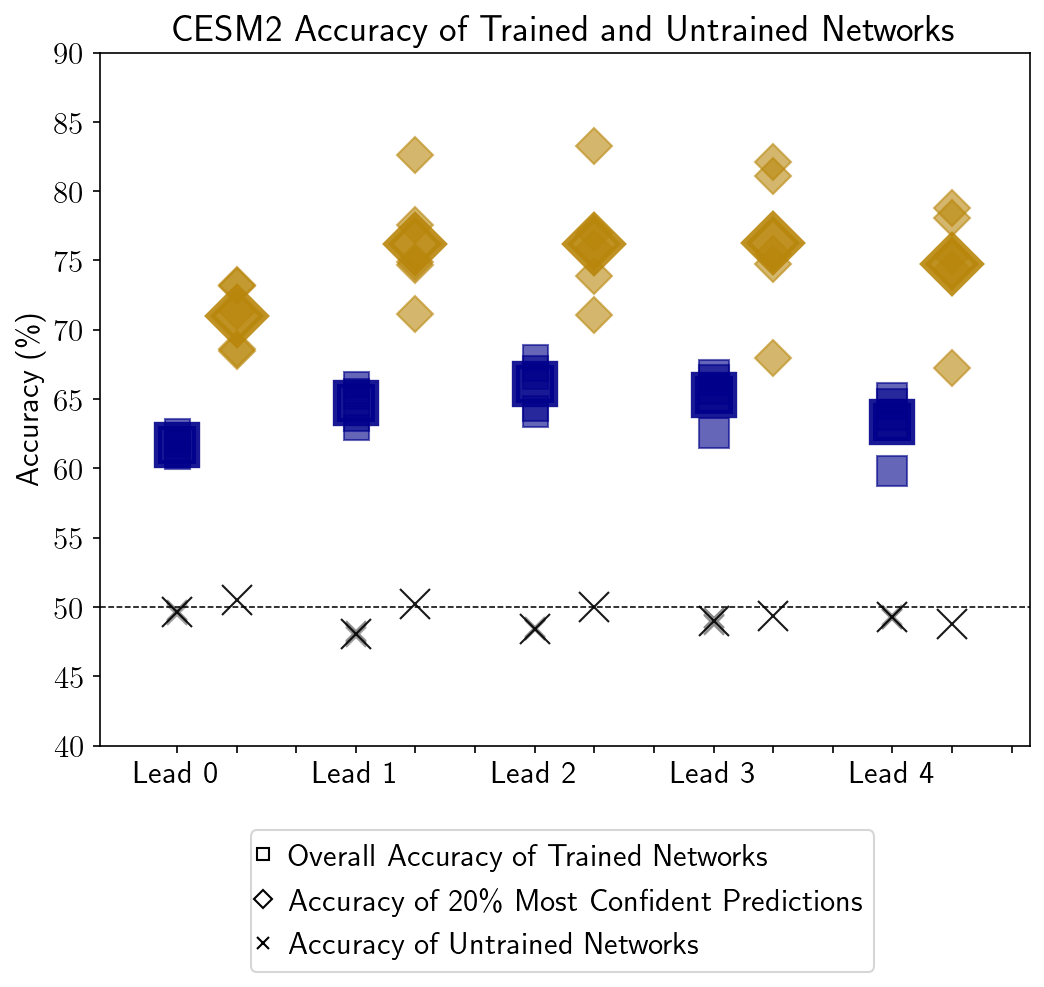

In [14]:
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#Plot Overall Accuracy of Each Test Member
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
array = np.arange(0,15,1)

fig, (ax1) = plt.subplots(1, figsize=(8,6))


ax1.plot(array[0],acc_seeds_all0, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[0],np.mean(acc_seeds_all0), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Alaska (trained model)')
ax1.plot(array[0],untrained0, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[0],np.mean(untrained0), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[0],overall_accuracy_all_trained0, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[1],acc_v_conf_test0_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[1],np.mean(acc_v_conf_test0_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
#ax1.plot(array[1],UT_acc_v_conf_test_avg_plot0, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[1],np.mean(UT_acc_v_conf_test_avg_plot0), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)

ax1.plot(array[3],acc_seeds_all1, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[3],np.mean(acc_seeds_all1), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Alaska (trained model)')
ax1.plot(array[3],untrained1, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[3],np.mean(untrained1), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
ax1.plot(array[4],acc_v_conf_test1_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[4],np.mean(acc_v_conf_test1_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
#ax1.plot(array[4],UT_acc_v_conf_test_avg_plot1, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[4],np.mean(UT_acc_v_conf_test_avg_plot1), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)

ax1.plot(array[6],acc_seeds_all2, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[6],np.mean(acc_seeds_all2), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Pacific Northwest (trained model)')
ax1.plot(array[6],untrained2, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[6],np.mean(untrained2), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
ax1.plot(array[7],acc_v_conf_test2_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[7],np.mean(acc_v_conf_test2_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
#ax1.plot(array[7],UT_acc_v_conf_test_avg_plot2, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[7],np.mean(UT_acc_v_conf_test_avg_plot2), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)

ax1.plot(array[9],acc_seeds_all3, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.6)
ax1.plot(array[9],np.mean(acc_seeds_all3), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[9],untrained3, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[9],np.mean(untrained3), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
ax1.plot(array[10],acc_v_conf_test3_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[10],np.mean(acc_v_conf_test3_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
#ax1.plot(array[10],UT_acc_v_conf_test_avg_plot3, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[10],np.mean(UT_acc_v_conf_test_avg_plot3), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)

ax1.plot(array[12],acc_seeds_all4, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.6)
ax1.plot(array[12],np.mean(acc_seeds_all4), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[12],untrained4, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[12],np.mean(untrained4), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[12],overall_accuracy_all_trained4, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[13],acc_v_conf_test4_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[13],np.mean(acc_v_conf_test4_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
#ax1.plot(array[13],UT_acc_v_conf_test_avg_plot4, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[13],np.mean(UT_acc_v_conf_test_avg_plot4), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)


ax1.set(xticks=(np.arange(0,15,step=1)))
#ax1.set(xlabel = 'Test Ensemble Member')
ax1.set(ylabel = 'Accuracy (\%)')
ax1.set(yticks=(np.arange(40,91,step=5)))
ax1.set(xticklabels=['Lead 0','','','Lead 1','','','Lead 2','','','Lead 3','','', 'Lead 4', '',''])

ax1.set(title='CESM2 Accuracy of Trained and Untrained Networks')

ax1.axhline(y=50, color='black', linestyle='--', linewidth=0.75)
plt.margins(x=0.1)
#plt.legend(loc='center right',ncol=1, bbox_to_anchor=(1.2, 0.3, 0.5, 0.5),borderpad=1.5,labelspacing = 1.6)

one = mlines.Line2D([], [], color='white', marker='s', markeredgecolor='black', label='Overall Accuracy of Trained Networks')
two = mlines.Line2D([], [], color='white', marker='D', markeredgecolor='black', label='Accuracy of 20\% Most Confident Predictions')
four = mlines.Line2D([], [], color='gray', marker='x', markeredgecolor='black', label='Accuracy of Untrained Networks')
plt.legend(handles=[one,two,four],handlelength=0, ncol=1, bbox_to_anchor=(0.85, -0.1)) 
#plt.legend(handles=[one,four],handlelength=0, ncol=1, bbox_to_anchor=(0.85, -0.1))  

#plt.savefig(ddir_figs+REGION_TAND+'_accuracy_trained_allmodels_allseeds.png', format='png',dpi=150)

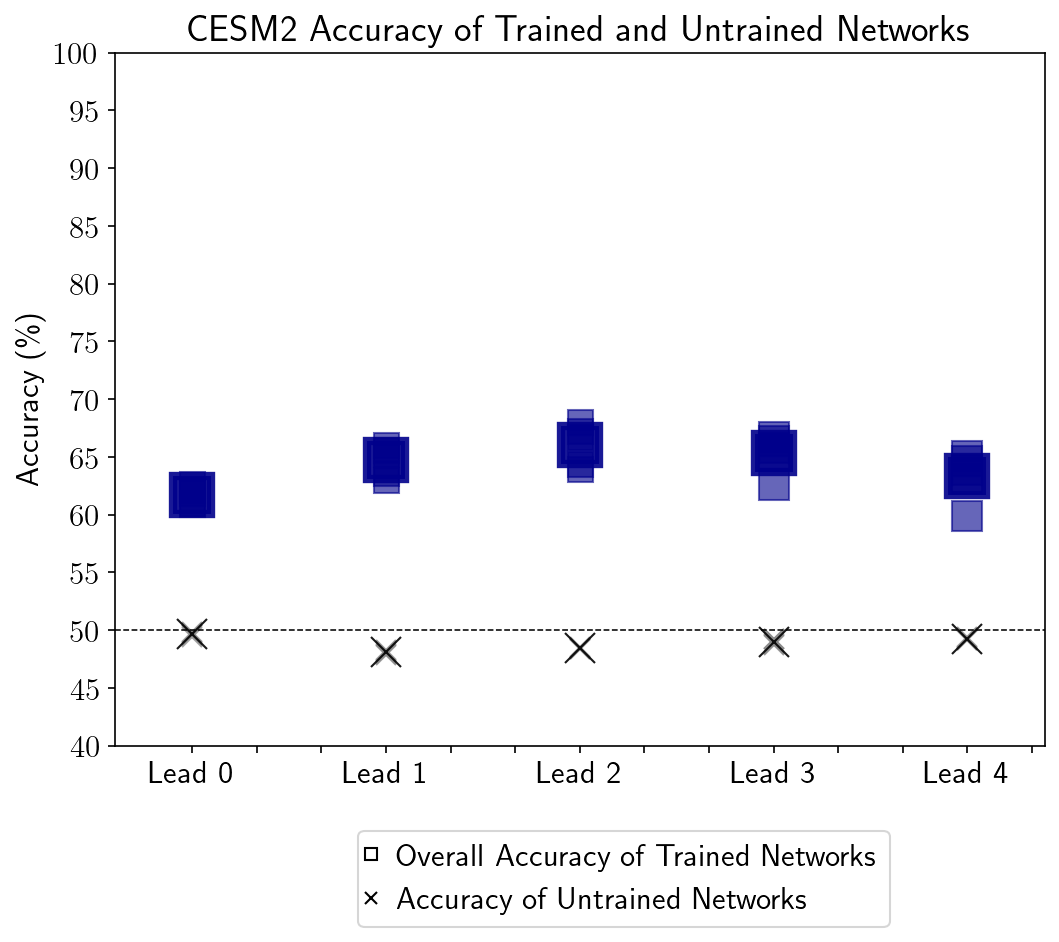

In [15]:
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#Plot Overall Accuracy of Each Test Member
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
array = np.arange(0,15,1)

fig, (ax1) = plt.subplots(1, figsize=(8,6))

ax1.plot(array[0],acc_seeds_all0, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[0],np.mean(acc_seeds_all0), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Alaska (trained model)')
ax1.plot(array[0],untrained0, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[0],np.mean(untrained0), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
# ax1.plot(array[1],acc_v_conf_test0_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[1],np.mean(acc_v_conf_test0_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# #ax1.plot(array[1],UT_acc_v_conf_test_avg_plot0, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
# ax1.plot(array[1],np.mean(UT_acc_v_conf_test_avg_plot0), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)

ax1.plot(array[3],acc_seeds_all1, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[3],np.mean(acc_seeds_all1), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Alaska (trained model)')
ax1.plot(array[3],untrained1, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[3],np.mean(untrained1), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
# ax1.plot(array[4],acc_v_conf_test1_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[4],np.mean(acc_v_conf_test1_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# #ax1.plot(array[4],UT_acc_v_conf_test_avg_plot1, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
# ax1.plot(array[4],np.mean(UT_acc_v_conf_test_avg_plot1), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)

ax1.plot(array[6],acc_seeds_all2, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[6],np.mean(acc_seeds_all2), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Pacific Northwest (trained model)')
ax1.plot(array[6],untrained2, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[6],np.mean(untrained2), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
# ax1.plot(array[7],acc_v_conf_test2_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[7],np.mean(acc_v_conf_test2_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# #ax1.plot(array[7],UT_acc_v_conf_test_avg_plot2, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
# ax1.plot(array[7],np.mean(UT_acc_v_conf_test_avg_plot2), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)

ax1.plot(array[9],acc_seeds_all3, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.6)
ax1.plot(array[9],np.mean(acc_seeds_all3), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[9],untrained3, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[9],np.mean(untrained3), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
# ax1.plot(array[10],acc_v_conf_test3_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[10],np.mean(acc_v_conf_test3_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# #ax1.plot(array[10],UT_acc_v_conf_test_avg_plot3, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
# ax1.plot(array[10],np.mean(UT_acc_v_conf_test_avg_plot3), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)

ax1.plot(array[12],acc_seeds_all4, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.6)
ax1.plot(array[12],np.mean(acc_seeds_all4), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[12],untrained4, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
ax1.plot(array[12],np.mean(untrained4), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
# ax1.plot(array[13],acc_v_conf_test4_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[13],np.mean(acc_v_conf_test4_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# #ax1.plot(array[13],UT_acc_v_conf_test_avg_plot4, 'x', color = 'slategray', markeredgecolor='gray', markersize=10, alpha = 0.7)
# ax1.plot(array[13],np.mean(UT_acc_v_conf_test_avg_plot4), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)


ax1.set(xticks=(np.arange(0,15,step=1)))
#ax1.set(xlabel = 'Test Ensemble Member')
ax1.set(ylabel = 'Accuracy (\%)')
ax1.set(yticks=(np.arange(40,101,step=5)))
ax1.set(xticklabels=['Lead 0','','','Lead 1','','','Lead 2','','','Lead 3','','', 'Lead 4', '',''])

ax1.set(title='CESM2 Accuracy of Trained and Untrained Networks')

ax1.axhline(y=50, color='black', linestyle='--', linewidth=0.75)
plt.margins(x=0.1)
#plt.legend(loc='center right',ncol=1, bbox_to_anchor=(1.2, 0.3, 0.5, 0.5),borderpad=1.5,labelspacing = 1.6)

one = mlines.Line2D([], [], color='white', marker='s', markeredgecolor='black', label='Overall Accuracy of Trained Networks')
two = mlines.Line2D([], [], color='white', marker='D', markeredgecolor='black', label='Accuracy of 20\% Most Confident Predictions')
four = mlines.Line2D([], [], color='gray', marker='x', markeredgecolor='black', label='Accuracy of Untrained Networks')
plt.legend(handles=[one,four],handlelength=0, ncol=1, bbox_to_anchor=(0.85, -0.1)) 
#plt.legend(handles=[one,four],handlelength=0, ncol=1, bbox_to_anchor=(0.85, -0.1))  

#plt.savefig(ddir_figs+REGION_TAND+'_accuracy_trained_allmodels_allseeds.png', format='png',dpi=150)

In [16]:
overall_accuracy_all_trained1.stack()

<xarray.DataArray (experiment: 5, seed: 5)>
array([[65.77236056, 65.81301093, 65.38617611, 65.44715166, 65.42682648],
       [63.23170662, 63.71951103, 64.12601471, 63.41463327, 63.57723475],
       [66.26016498, 67.05284715, 65.28455019, 65.65040946, 66.05691314],
       [62.92682886, 62.66260147, 62.88617849, 63.2520318 , 63.19105625],
       [65.16259909, 65.38617611, 65.46747684, 65.1422739 , 65.10162354]])
Coordinates:
  * experiment  (experiment) int64 0 1 2 3 4
  * seed        (seed) int64 0 1 2 3 4

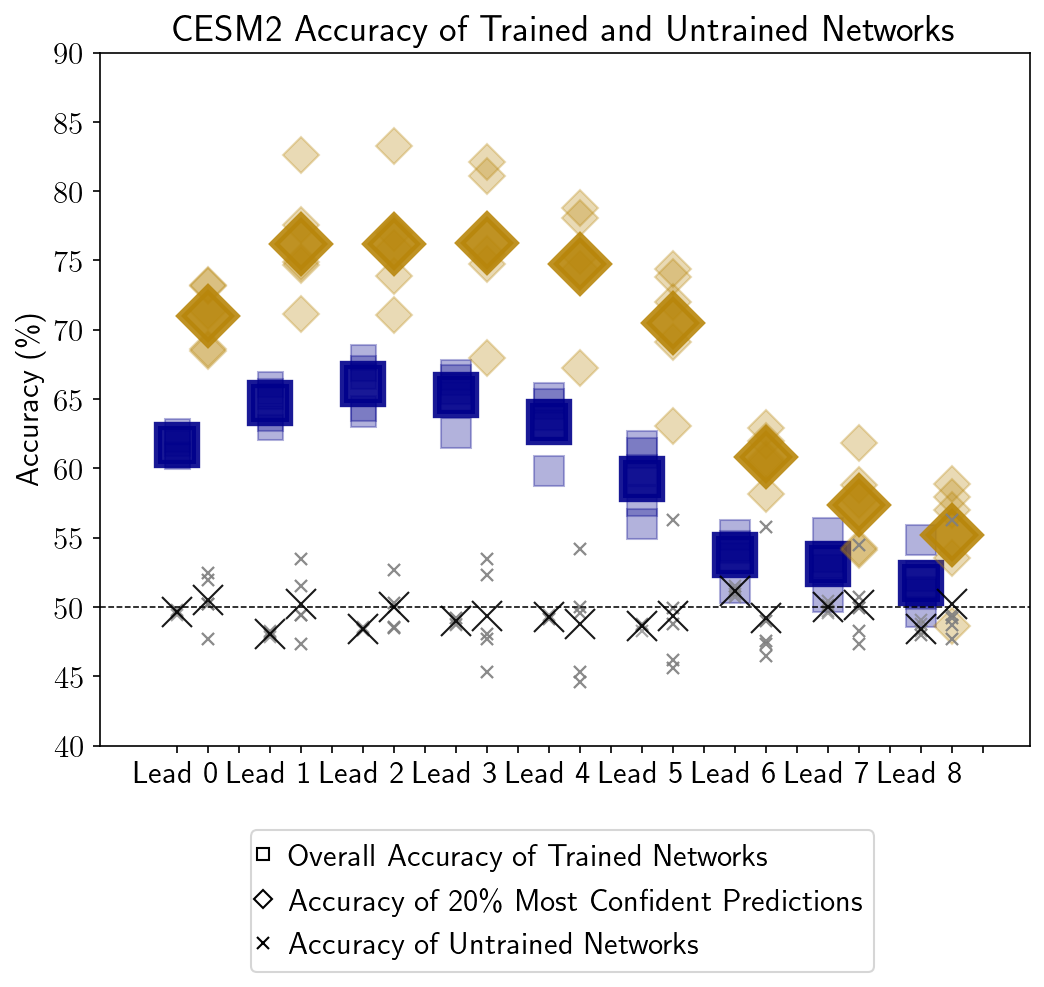

In [17]:
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#Plot Overall Accuracy of Each Test Member
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
array = np.arange(0,27,1)

fig, (ax1) = plt.subplots(1, figsize=(8,6))


ax1.plot(array[0],acc_seeds_all0, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[0],np.mean(acc_seeds_all0), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Alaska (trained model)')
ax1.plot(array[0],untrained0, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[0],np.mean(untrained0), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[0],overall_accuracy_all_trained0, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[1],acc_v_conf_test0_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[1],np.mean(acc_v_conf_test0_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
#ax1.plot(array[1],conf_preds0, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)
ax1.plot(array[1],UT_acc_v_conf_test_avg_plot0, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[1],np.mean(UT_acc_v_conf_test_avg_plot0), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)

ax1.plot(array[3],acc_seeds_all1, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[3],np.mean(acc_seeds_all1), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Alaska (trained model)')
ax1.plot(array[3],untrained1, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[3],np.mean(untrained1), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[3],overall_accuracy_all_trained1, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[4],acc_v_conf_test1_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[4],np.mean(acc_v_conf_test1_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[4],UT_acc_v_conf_test_avg_plot1, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[4],np.mean(UT_acc_v_conf_test_avg_plot1), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[4],conf_preds1, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[6],acc_seeds_all2, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[6],np.mean(acc_seeds_all2), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Pacific Northwest (trained model)')
ax1.plot(array[6],untrained2, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[6],np.mean(untrained2), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[6],overall_accuracy_all_trained2, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[7],acc_v_conf_test2_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[7],np.mean(acc_v_conf_test2_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[7],UT_acc_v_conf_test_avg_plot2, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[7],np.mean(UT_acc_v_conf_test_avg_plot2), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[7],conf_preds2, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[9],acc_seeds_all3, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[9],np.mean(acc_seeds_all3), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[9],untrained3, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[9],np.mean(untrained3), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[9],overall_accuracy_all_trained3, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[10],acc_v_conf_test3_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[10],np.mean(acc_v_conf_test3_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[10],UT_acc_v_conf_test_avg_plot3, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[10],np.mean(UT_acc_v_conf_test_avg_plot3), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[10],conf_preds3, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[12],acc_seeds_all4, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[12],np.mean(acc_seeds_all4), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[12],untrained4, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[12],np.mean(untrained4), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[12],overall_accuracy_all_trained4, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[13],acc_v_conf_test4_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[13],np.mean(acc_v_conf_test4_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[13],UT_acc_v_conf_test_avg_plot4, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[13],np.mean(UT_acc_v_conf_test_avg_plot4), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[13],conf_preds4, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[15],acc_seeds_all5, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[15],np.mean(acc_seeds_all5), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[15],untrained5, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[15],np.mean(untrained5), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[15],overall_accuracy_all_trained5, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[16],acc_v_conf_test5_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[16],np.mean(acc_v_conf_test5_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[16],UT_acc_v_conf_test_avg_plot5, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[16],np.mean(UT_acc_v_conf_test_avg_plot5), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[16],conf_preds5, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[18],acc_seeds_all6, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[18],np.mean(acc_seeds_all6), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[18],untrained6, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[18],np.mean(untrained6), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[18],overall_accuracy_all_trained6, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[19],acc_v_conf_test6_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[19],np.mean(acc_v_conf_test6_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[19],UT_acc_v_conf_test_avg_plot6, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[19],np.mean(UT_acc_v_conf_test_avg_plot6), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[19],conf_preds6, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[21],acc_seeds_all7, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[21],np.mean(acc_seeds_all7), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[21],untrained7, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[21],np.mean(untrained7), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[21],overall_accuracy_all_trained7, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[22],acc_v_conf_test7_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[22],np.mean(acc_v_conf_test7_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[22],UT_acc_v_conf_test_avg_plot7, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[22],np.mean(UT_acc_v_conf_test_avg_plot7), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[22],conf_preds7, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[24],acc_seeds_all8, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[24],np.mean(acc_seeds_all8), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[24],untrained8, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[24],np.mean(untrained8), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[24],overall_accuracy_all_trained8, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
ax1.plot(array[25],acc_v_conf_test8_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[25],np.mean(acc_v_conf_test8_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[25],UT_acc_v_conf_test_avg_plot8, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[25],np.mean(UT_acc_v_conf_test_avg_plot8), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[25],conf_preds8, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)


ax1.set(xticks=(np.arange(0,27,step=1)))
#ax1.set(xlabel = 'Test Ensemble Member')
ax1.set(ylabel = 'Accuracy (\%)')
ax1.set(yticks=(np.arange(40,91,step=5)))
ax1.set(xticklabels=['Lead 0','','','Lead 1','','','Lead 2','','','Lead 3','','', 'Lead 4', '','', 'Lead 5', '','', 'Lead 6', '','', 'Lead 7', '','', 'Lead 8', '',''])

ax1.set(title='CESM2 Accuracy of Trained and Untrained Networks')

ax1.axhline(y=50, color='black', linestyle='--', linewidth=0.75)
plt.margins(x=0.1)
#plt.legend(loc='center right',ncol=1, bbox_to_anchor=(1.2, 0.3, 0.5, 0.5),borderpad=1.5,labelspacing = 1.6)

one = mlines.Line2D([], [], color='white', marker='s', markeredgecolor='black', label='Overall Accuracy of Trained Networks')
two = mlines.Line2D([], [], color='white', marker='D', markeredgecolor='black', label='Accuracy of 20\% Most Confident Predictions')
four = mlines.Line2D([], [], color='gray', marker='x', markeredgecolor='black', label='Accuracy of Untrained Networks')
plt.legend(handles=[one,two,four],handlelength=0, ncol=1, bbox_to_anchor=(0.85, -0.1)) 
#plt.legend(handles=[one,four],handlelength=0, ncol=1, bbox_to_anchor=(0.85, -0.1))  

plt.savefig(ddir_out+'accuracy_trained_allmodels_allseeds_allleads.png', format='png',dpi=150)

## For Presentation

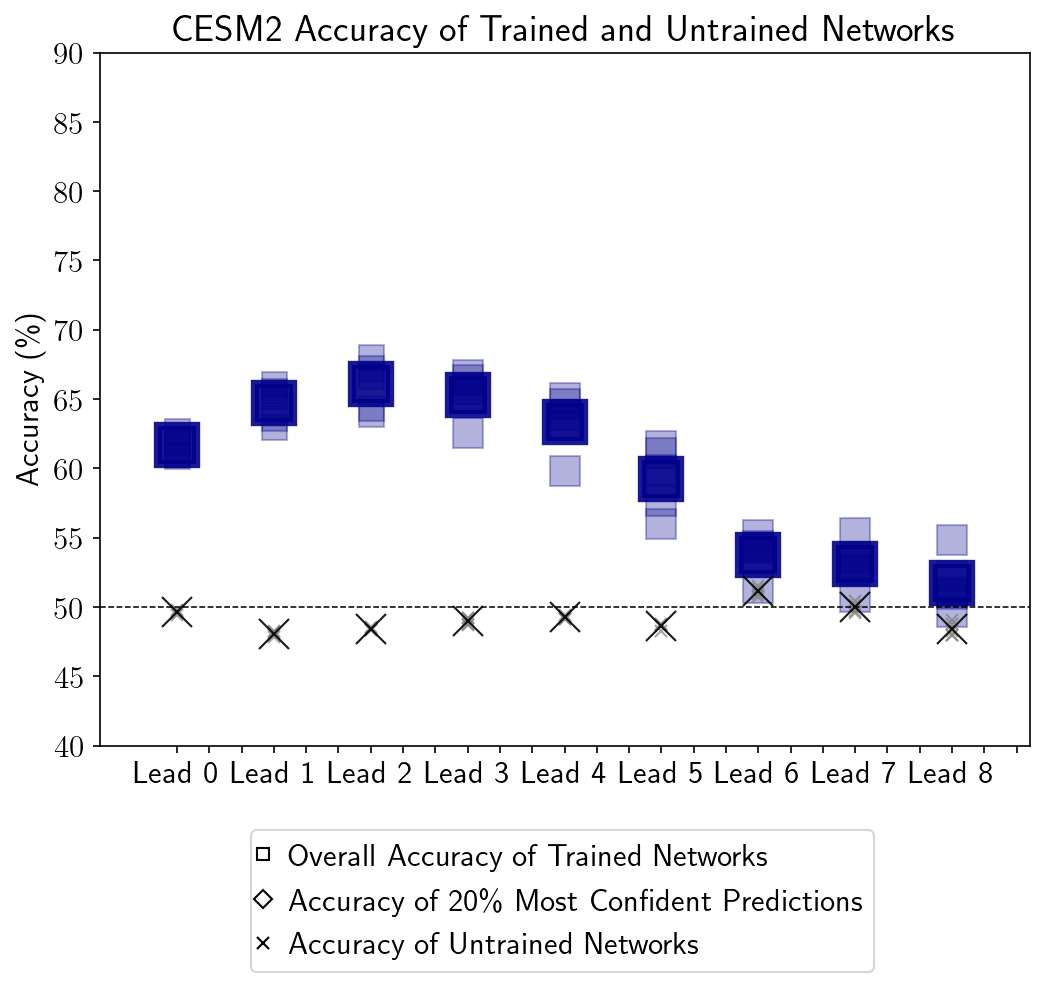

In [18]:
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#Plot Overall Accuracy of Each Test Member
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
array = np.arange(0,27,1)

fig, (ax1) = plt.subplots(1, figsize=(8,6))


ax1.plot(array[0],acc_seeds_all0, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[0],np.mean(acc_seeds_all0), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Alaska (trained model)')
ax1.plot(array[0],untrained0, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[0],np.mean(untrained0), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[0],overall_accuracy_all_trained0, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[1],acc_v_conf_test0_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[1],np.mean(acc_v_conf_test0_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# #ax1.plot(array[1],conf_preds0, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)
# ax1.plot(array[1],UT_acc_v_conf_test_avg_plot0, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
# ax1.plot(array[1],np.mean(UT_acc_v_conf_test_avg_plot0), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)

ax1.plot(array[3],acc_seeds_all1, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[3],np.mean(acc_seeds_all1), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Alaska (trained model)')
ax1.plot(array[3],untrained1, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[3],np.mean(untrained1), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[3],overall_accuracy_all_trained1, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[4],acc_v_conf_test1_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[4],np.mean(acc_v_conf_test1_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# ax1.plot(array[4],UT_acc_v_conf_test_avg_plot1, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
# ax1.plot(array[4],np.mean(UT_acc_v_conf_test_avg_plot1), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
# #ax1.plot(array[4],conf_preds1, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[6],acc_seeds_all2, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[6],np.mean(acc_seeds_all2), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Pacific Northwest (trained model)')
ax1.plot(array[6],untrained2, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[6],np.mean(untrained2), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[6],overall_accuracy_all_trained2, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[7],acc_v_conf_test2_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[7],np.mean(acc_v_conf_test2_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# ax1.plot(array[7],UT_acc_v_conf_test_avg_plot2, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
# ax1.plot(array[7],np.mean(UT_acc_v_conf_test_avg_plot2), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
# #ax1.plot(array[7],conf_preds2, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[9],acc_seeds_all3, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[9],np.mean(acc_seeds_all3), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[9],untrained3, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[9],np.mean(untrained3), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[9],overall_accuracy_all_trained3, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[10],acc_v_conf_test3_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[10],np.mean(acc_v_conf_test3_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# ax1.plot(array[10],UT_acc_v_conf_test_avg_plot3, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
# ax1.plot(array[10],np.mean(UT_acc_v_conf_test_avg_plot3), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
# #ax1.plot(array[10],conf_preds3, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[12],acc_seeds_all4, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[12],np.mean(acc_seeds_all4), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[12],untrained4, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[12],np.mean(untrained4), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[12],overall_accuracy_all_trained4, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[13],acc_v_conf_test4_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[13],np.mean(acc_v_conf_test4_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# ax1.plot(array[13],UT_acc_v_conf_test_avg_plot4, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
# ax1.plot(array[13],np.mean(UT_acc_v_conf_test_avg_plot4), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
#ax1.plot(array[13],conf_preds4, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[15],acc_seeds_all5, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[15],np.mean(acc_seeds_all5), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[15],untrained5, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[15],np.mean(untrained5), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[15],overall_accuracy_all_trained5, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[16],acc_v_conf_test5_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[16],np.mean(acc_v_conf_test5_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# ax1.plot(array[16],UT_acc_v_conf_test_avg_plot5, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
# ax1.plot(array[16],np.mean(UT_acc_v_conf_test_avg_plot5), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
# #ax1.plot(array[16],conf_preds5, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[18],acc_seeds_all6, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[18],np.mean(acc_seeds_all6), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[18],untrained6, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[18],np.mean(untrained6), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[18],overall_accuracy_all_trained6, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[19],acc_v_conf_test6_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[19],np.mean(acc_v_conf_test6_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# ax1.plot(array[19],UT_acc_v_conf_test_avg_plot6, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
# ax1.plot(array[19],np.mean(UT_acc_v_conf_test_avg_plot6), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
# #ax1.plot(array[19],conf_preds6, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[21],acc_seeds_all7, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[21],np.mean(acc_seeds_all7), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[21],untrained7, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[21],np.mean(untrained7), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[21],overall_accuracy_all_trained7, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[22],acc_v_conf_test7_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[22],np.mean(acc_v_conf_test7_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# ax1.plot(array[22],UT_acc_v_conf_test_avg_plot7, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
# ax1.plot(array[22],np.mean(UT_acc_v_conf_test_avg_plot7), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
# #ax1.plot(array[22],conf_preds7, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[24],acc_seeds_all8, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[24],np.mean(acc_seeds_all8), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[24],untrained8, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
ax1.plot(array[24],np.mean(untrained8), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9,label='Untrained Model')
#ax1.plot(array[24],overall_accuracy_all_trained8, 's', color = 'lightgray', markeredgecolor='lightgray', markeredgewidth=1,markersize=12, alpha = 0.6)
# ax1.plot(array[25],acc_v_conf_test8_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[25],np.mean(acc_v_conf_test8_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)
# ax1.plot(array[25],UT_acc_v_conf_test_avg_plot8, 'x', color = 'slategray', markeredgecolor='gray', markersize=6, alpha = 0.7)
# ax1.plot(array[25],np.mean(UT_acc_v_conf_test_avg_plot8), 'x', color = 'black', markeredgecolor='black', markersize=14, alpha = 0.9)
# #ax1.plot(array[25],conf_preds8, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)


ax1.set(xticks=(np.arange(0,27,step=1)))
#ax1.set(xlabel = 'Test Ensemble Member')
ax1.set(ylabel = 'Accuracy (\%)')
ax1.set(yticks=(np.arange(40,91,step=5)))
ax1.set(xticklabels=['Lead 0','','','Lead 1','','','Lead 2','','','Lead 3','','', 'Lead 4', '','', 'Lead 5', '','', 'Lead 6', '','', 'Lead 7', '','', 'Lead 8', '',''])

ax1.set(title='CESM2 Accuracy of Trained and Untrained Networks')

ax1.axhline(y=50, color='black', linestyle='--', linewidth=0.75)
plt.margins(x=0.1)
#plt.legend(loc='center right',ncol=1, bbox_to_anchor=(1.2, 0.3, 0.5, 0.5),borderpad=1.5,labelspacing = 1.6)

one = mlines.Line2D([], [], color='white', marker='s', markeredgecolor='black', label='Overall Accuracy of Trained Networks')
two = mlines.Line2D([], [], color='white', marker='D', markeredgecolor='black', label='Accuracy of 20\% Most Confident Predictions')
four = mlines.Line2D([], [], color='gray', marker='x', markeredgecolor='black', label='Accuracy of Untrained Networks')
plt.legend(handles=[one,two,four],handlelength=0, ncol=1, bbox_to_anchor=(0.85, -0.1)) 
#plt.legend(handles=[one,four],handlelength=0, ncol=1, bbox_to_anchor=(0.85, -0.1))  

plt.savefig(ddir_out+'NOFOOs_accuracy_trained_allmodels_allseeds_allleads.png', format='png',dpi=150)

In [19]:
ddir_out = '/Users/marcodia/Research/salinity_s2s/experiments/no_arctic/evaluations/'

# Compute Binomial Distribution Instead

In [20]:
from statsmodels.stats.proportion import proportion_confint
# count = # of successes
# nobs = total # of trials
# alpha = significance level
# method = confidence interval method; default = normal 

In [21]:
conf_ints = proportion_confint(count=2460,nobs=4920,alpha=0.01,method='normal')
conf_ints

(0.48163865323757704, 0.518361346762423)

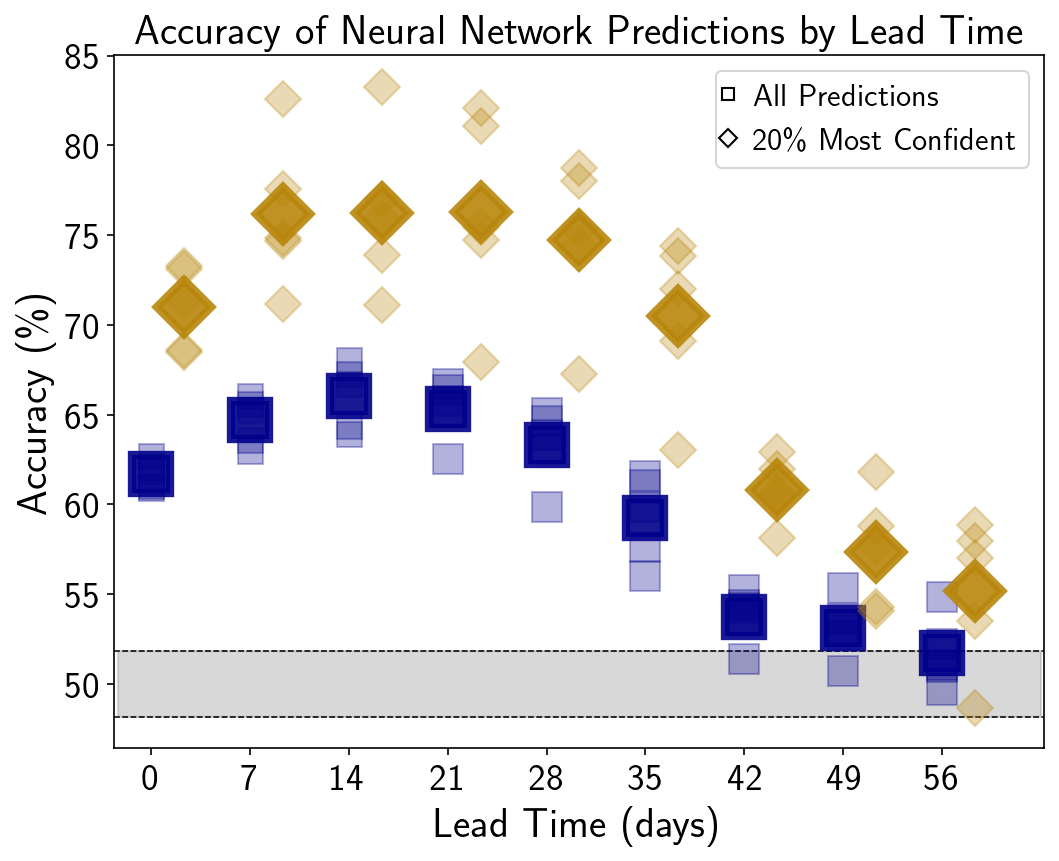

In [22]:
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#Plot Overall Accuracy of Each Test Member
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
array = np.arange(0,27,1)
array_plot = np.arange(-1,28,1)
fig, (ax1) = plt.subplots(1, figsize=(8,6))

ax1.axhline(y=conf_ints[0]*100, color='black', linestyle='--', linewidth=0.75)
ax1.axhline(y=conf_ints[1]*100, color='black', linestyle='--', linewidth=0.75)
ax1.fill_between(array_plot,conf_ints[0]*100,conf_ints[1]*100, color = 'gray', alpha=0.3)

ax1.plot(array[0],acc_seeds_all0, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[0],np.mean(acc_seeds_all0), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Alaska (trained model)')
ax1.plot(array[1],acc_v_conf_test0_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[1],np.mean(acc_v_conf_test0_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[3],acc_seeds_all1, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[3],np.mean(acc_seeds_all1), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Alaska (trained model)')
ax1.plot(array[4],acc_v_conf_test1_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[4],np.mean(acc_v_conf_test1_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[6],acc_seeds_all2, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[6],np.mean(acc_seeds_all2), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Pacific Northwest (trained model)')
ax1.plot(array[7],acc_v_conf_test2_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[7],np.mean(acc_v_conf_test2_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[9],acc_seeds_all3, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[9],np.mean(acc_seeds_all3), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[10],acc_v_conf_test3_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[10],np.mean(acc_v_conf_test3_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[12],acc_seeds_all4, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[12],np.mean(acc_seeds_all4), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[13],acc_v_conf_test4_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[13],np.mean(acc_v_conf_test4_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[15],acc_seeds_all5, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[15],np.mean(acc_seeds_all5), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[16],acc_v_conf_test5_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[16],np.mean(acc_v_conf_test5_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[18],acc_seeds_all6, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[18],np.mean(acc_seeds_all6), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[19],acc_v_conf_test6_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[19],np.mean(acc_v_conf_test6_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[21],acc_seeds_all7, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[21],np.mean(acc_seeds_all7), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[22],acc_v_conf_test7_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[22],np.mean(acc_v_conf_test7_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[24],acc_seeds_all8, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[24],np.mean(acc_seeds_all8), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
ax1.plot(array[25],acc_v_conf_test8_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[25],np.mean(acc_v_conf_test8_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.set(xticks=(np.arange(0,27,step=3)))
#ax1.set(xlabel = 'Test Ensemble Member')
ax1.set_ylabel('Accuracy (\%)',fontsize=20)
ax1.set(yticks=(np.arange(50,86,step=5)))
ax1.set(yticklabels=(np.arange(50,86,step=5)))
ax1.set_xlabel('Lead Time (days)',fontsize=20)
ax1.set(xticklabels=['0','7','14','21', '28', '35', '42',  '49', '56'])
ax1.tick_params(axis='both',labelsize=18)

ax1.set_title('Accuracy of Neural Network Predictions by Lead Time',fontsize=20)


#ax1.fill_between(conf_ints[0],conf_ints[1])
plt.margins(x=0.004)

#plt.legend(loc='center right',ncol=1, bbox_to_anchor=(1.2, 0.3, 0.5, 0.5),borderpad=1.5,labelspacing = 1.6)

one = mlines.Line2D([], [], color='white', marker='s', markeredgecolor='black', label='All Predictions')
two = mlines.Line2D([], [], color='white', marker='D', markeredgecolor='black', label='20\% Most Confident')
plt.legend(handles=[one,two],handlelength=0, ncol=1, loc = 'upper right')#bbox_to_anchor=(0.85, -0.1)) 
#plt.legend(handles=[one,four],handlelength=0, ncol=1, bbox_to_anchor=(0.85, -0.1))  

plt.savefig(ddir_out+'accuracy_trained_allmodels_allseeds_allleads.png', format='png',dpi=150)

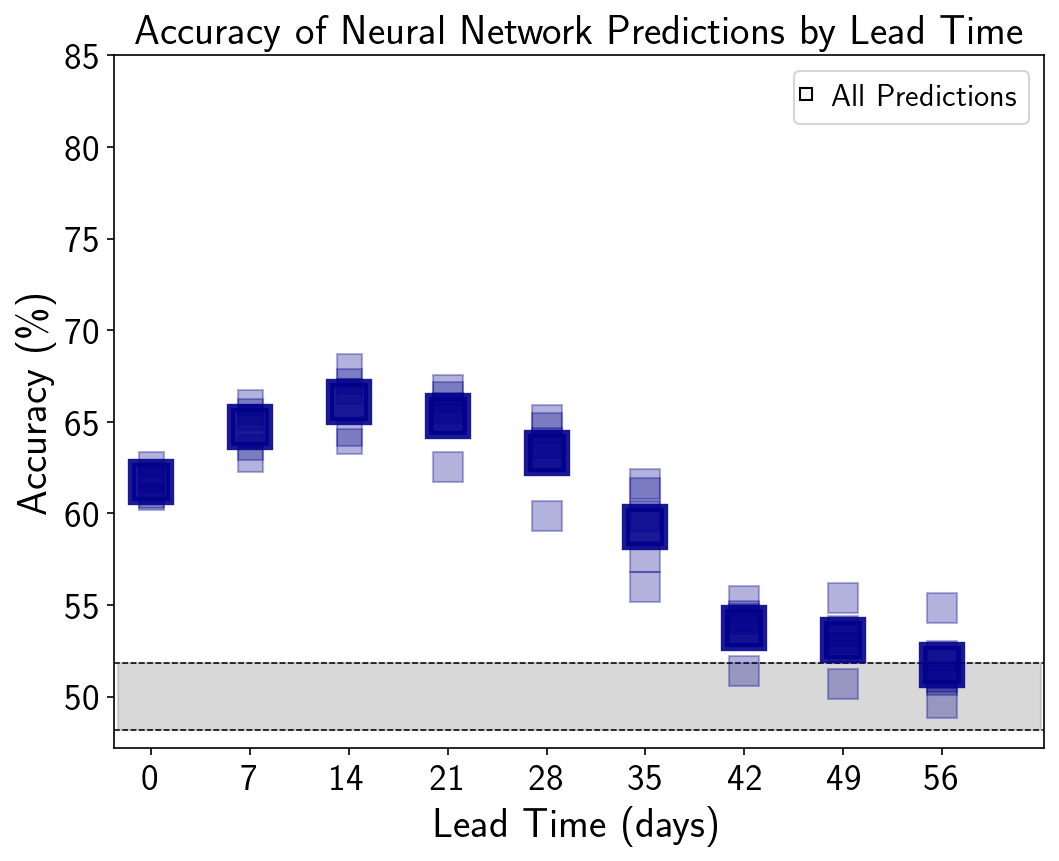

In [23]:
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#Plot Overall Accuracy of Each Test Member
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
array = np.arange(0,27,1)
array_plot = np.arange(-1,28,1)
fig, (ax1) = plt.subplots(1, figsize=(8,6))

ax1.axhline(y=conf_ints[0]*100, color='black', linestyle='--', linewidth=0.75)
ax1.axhline(y=conf_ints[1]*100, color='black', linestyle='--', linewidth=0.75)
ax1.fill_between(array_plot,conf_ints[0]*100,conf_ints[1]*100, color = 'gray', alpha=0.3)

ax1.plot(array[0],acc_seeds_all0, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[0],np.mean(acc_seeds_all0), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Alaska (trained model)')
# ax1.plot(array[1],acc_v_conf_test0_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[1],np.mean(acc_v_conf_test0_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[3],acc_seeds_all1, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[3],np.mean(acc_seeds_all1), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Alaska (trained model)')
# ax1.plot(array[4],acc_v_conf_test1_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[4],np.mean(acc_v_conf_test1_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[6],acc_seeds_all2, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[6],np.mean(acc_seeds_all2), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='Pacific Northwest (trained model)')
# ax1.plot(array[7],acc_v_conf_test2_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[7],np.mean(acc_v_conf_test2_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[9],acc_seeds_all3, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[9],np.mean(acc_seeds_all3), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
# ax1.plot(array[10],acc_v_conf_test3_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[10],np.mean(acc_v_conf_test3_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[12],acc_seeds_all4, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[12],np.mean(acc_seeds_all4), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
# ax1.plot(array[13],acc_v_conf_test4_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[13],np.mean(acc_v_conf_test4_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[15],acc_seeds_all5, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[15],np.mean(acc_seeds_all5), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
# ax1.plot(array[16],acc_v_conf_test5_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[16],np.mean(acc_v_conf_test5_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[18],acc_seeds_all6, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[18],np.mean(acc_seeds_all6), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
# ax1.plot(array[19],acc_v_conf_test6_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[19],np.mean(acc_v_conf_test6_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[21],acc_seeds_all7, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[21],np.mean(acc_seeds_all7), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
# ax1.plot(array[22],acc_v_conf_test7_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[22],np.mean(acc_v_conf_test7_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[24],acc_seeds_all8, 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=1,markersize=14, alpha = 0.3)
ax1.plot(array[24],np.mean(acc_seeds_all8), 's', color = 'darkblue', markeredgecolor='darkblue', markeredgewidth=4,markersize=18, alpha = 0.9, label='California (trained model)')
# ax1.plot(array[25],acc_v_conf_test8_plot, 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=1,markersize=12, alpha = 0.3)
# ax1.plot(array[25],np.mean(acc_v_conf_test8_avg,axis=0), 'D', color = 'darkgoldenrod', markeredgecolor='darkgoldenrod', markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.set(xticks=(np.arange(0,27,step=3)))
#ax1.set(xlabel = 'Test Ensemble Member')
ax1.set_ylabel('Accuracy (\%)',fontsize=20)
ax1.set(yticks=(np.arange(50,86,step=5)))
ax1.set(yticklabels=(np.arange(50,86,step=5)))
ax1.set_xlabel('Lead Time (days)',fontsize=20)
ax1.set(xticklabels=['0','7','14','21', '28', '35', '42',  '49', '56'])
ax1.tick_params(axis='both',labelsize=18)

ax1.set_title('Accuracy of Neural Network Predictions by Lead Time',fontsize=20)


#ax1.fill_between(conf_ints[0],conf_ints[1])
plt.margins(x=0.004)

#plt.legend(loc='center right',ncol=1, bbox_to_anchor=(1.2, 0.3, 0.5, 0.5),borderpad=1.5,labelspacing = 1.6)

one = mlines.Line2D([], [], color='white', marker='s', markeredgecolor='black', label='All Predictions')
#two = mlines.Line2D([], [], color='white', marker='D', markeredgecolor='black', label='20\% Most Confident')
plt.legend(handles=[one],handlelength=0, ncol=1, loc = 'upper right')#bbox_to_anchor=(0.85, -0.1)) 
#plt.legend(handles=[one,four],handlelength=0, ncol=1, bbox_to_anchor=(0.85, -0.1))  

plt.savefig(ddir_out+'accuracy_trained_allmodels_allseeds_allleads_NOFOOs.png', format='png',dpi=150)

In [24]:
ddir_out

'/Users/marcodia/Research/salinity_s2s/experiments/no_arctic/evaluations/'

In [41]:
lead_week = 3
untrained3 = xr.open_dataarray(ddir_in+'untrained_accuracy_'+str(lead_week)+'wklead_testens'+str(2)+'.nc') 
# UT_acc_v_conf_test_avg3 = untrained3[:,conf_int]
# UT_acc_v_conf_test_avg3 = np.resize(UT_acc_v_conf_test_avg3,([10,1]))
# UT_acc_v_conf_test_avg_plot3 = np.transpose(UT_acc_v_conf_test_avg3)
# untrained3 = np.resize(untrained3,([num_experiments,1]))
# #untrained3 = untrained3*100
# untrained3 = np.transpose(untrained3)

In [42]:
untrained3

<xarray.DataArray (dim_0: 5, dim_1: 20)>
array([[49.613821, 50.12837 , 50.451671, 50.693448, 51.01626 , 50.785908,
        50.754936, 50.938086, 51.355014, 51.884701, 52.235772, 52.484192,
        51.371951, 50.754936, 50.542005, 49.593496, 49.593496, 50.542005,
        53.658537, 50.813008],
       [52.581301, 52.588789, 52.822945, 53.10856 , 53.252033, 53.062331,
        53.04878 , 52.970607, 53.184282, 52.993348, 53.821138, 53.658537,
        53.353659, 53.252033, 52.642276, 51.219512, 51.219512, 49.728997,
        48.577236, 42.682927],
       [48.739837, 48.609328, 48.419151, 47.871832, 48.145325, 47.750678,
        47.706156, 47.592245, 47.425474, 47.524021, 47.845528, 48.328817,
        49.237805, 49.477352, 50.813008, 50.650407, 51.219512, 51.897019,
        51.01626 , 53.252033],
       [47.865854, 47.75353 , 47.583559, 47.537064, 47.256098, 47.262873,
        47.0964  , 46.654159, 46.172087, 46.341463, 46.544715, 47.109304,
        46.79878 , 45.180023, 44.03794 , 42.03252 , 40.142276, 39.837398,
        42.479675, 47.96748 ],
       [47.479675, 47.539581, 47.538392, 47.752272, 47.865854, 47.99458 ,
        48.025552, 47.842402, 47.45935 , 46.711013, 45.853659, 45.30262 ,
        44.664634, 44.889663, 45.325203, 46.910569, 48.170732, 51.761518,
        51.626016, 49.186992]])
Dimensions without coordinates: dim_0, dim_1

In [43]:
exp = 0 #choose 1 ensemble member to plot
acc_v_conf_val = acc_v_conf_val3
acc_v_conf_test = acc_v_conf_test3

In [ ]:
ax1.set(xticks=(np.arange(0,27,step=3)))
#ax1.set(xlabel = 'Test Ensemble Member')
ax1.set_ylabel('Accuracy (\%)',fontsize=20)
ax1.set(yticks=(np.arange(50,86,step=5)))
ax1.set(yticklabels=(np.arange(50,86,step=5)))
ax1.set_xlabel('Lead Time (days)',fontsize=20)
ax1.set(xticklabels=['0','7','14','21', '28', '35', '42',  '49', '56'])
ax1.tick_params(axis='both',labelsize=18)

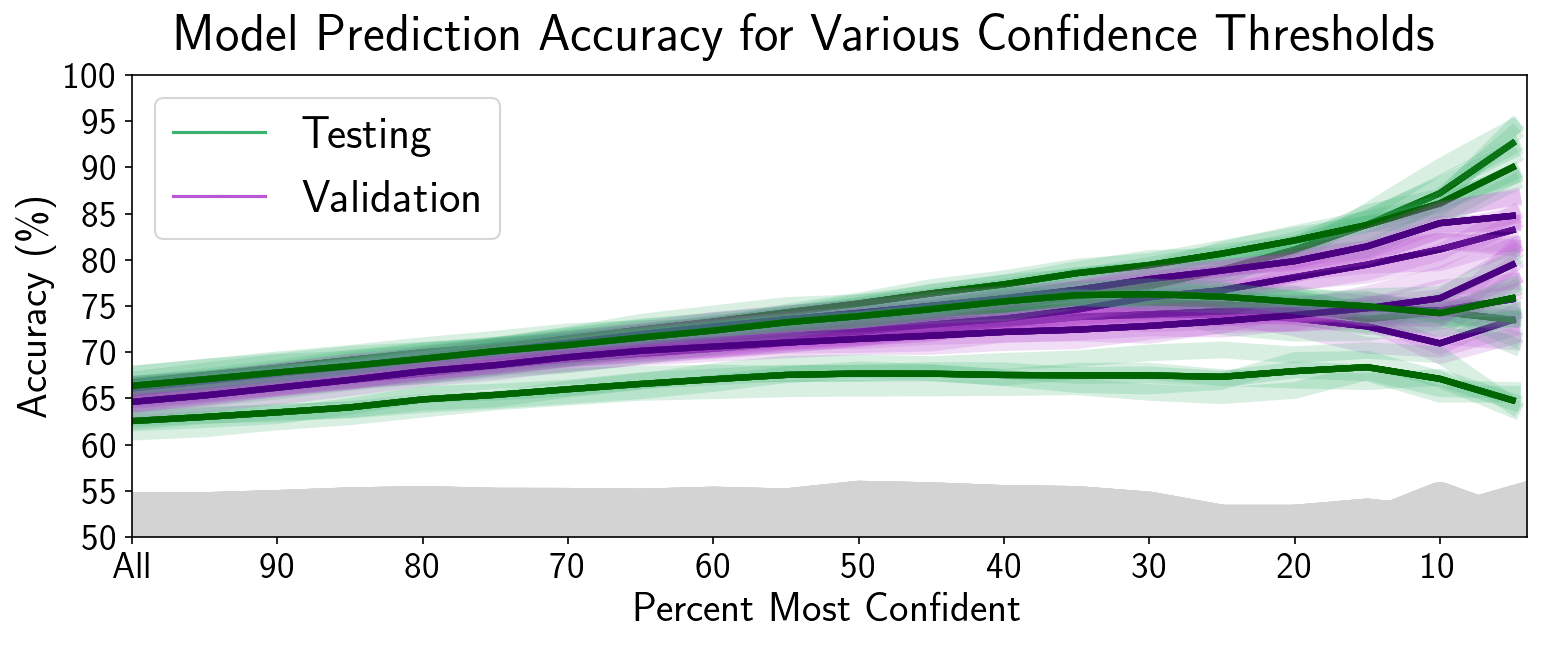

In [55]:
fig, ax = plt.subplots(1,1, figsize=(12,4)) #sharex = True

for exp in np.arange(num_experiments):
    for SEED in np.arange(0,num_seeds):
        ax.plot(np.arange(0,100,5), acc_v_conf_val[exp,SEED,:], color = 'mediumorchid', linewidth=8, alpha=0.2)
        ax.plot(np.arange(0,100,5), np.mean(acc_v_conf_val,axis=1)[exp,:], color = 'indigo', linewidth=3)
        ax.plot(np.arange(0,100,5), acc_v_conf_test[exp,SEED,:], color = 'mediumseagreen', linewidth=8, alpha=0.2)
        ax.plot(np.arange(0,100,5), np.mean(acc_v_conf_test,axis=1)[exp,:], color = 'darkgreen', linewidth=3)

        ax.plot(np.arange(0,100,5), untrained3[SEED,:], color = 'lightgray', linewidth=20)
    #    ax.plot(np.arange(0,100,5), untrained_acc_v_conf3[SEED,:]-2, color = 'lightgray', linewidth=20)
        
#         ax.set(xticks=(np.arange(0,100,step=10)))
#         ax.set(xlim=(0,96))
#         ax.set(ylim=(50,100))
# #        ax.set(yticklabels=(np.arange(50,105, step=5)))
#         ax.set(xticklabels = ['All', '90', '80', '70', '60', '50', '40', '30', '20', '10'])
#         #ax.set_title('Test Ensemble Member '+str(exp),fontsize =14)
#         ax.set(ylabel='Accuracy (\%)')
#         ax.set(xlabel='Percent Most Confident')

        ax.set(xticks=(np.arange(0,100,step=10)))
        ax.set(xticklabels = ['All', '90', '80', '70', '60', '50', '40', '30', '20', '10'])
        #ax1.set(xlabel = 'Test Ensemble Member')
        ax.set_ylabel('Accuracy (\%)',fontsize=20)
        ax.set(yticks=(np.arange(50,105,step=5)))
        ax.set(yticklabels=(np.arange(50,105,step=5)))
        ax.set_xlabel('Percent Most Confident',fontsize=20)
        ax.tick_params(axis='both',labelsize=18)
        ax.set(xlim=(0,96))
        ax.set(ylim=(50,100))

labels = ['Testing','Validation']            
#fig.subplots_adjust(top=0.91, wspace = 0.2, hspace = 0.6)
plt.suptitle(('Model Prediction Accuracy for Various Confidence Thresholds '), fontsize='25')
one = mlines.Line2D([], [], color='mediumseagreen', marker='_',  label='Testing')
two = mlines.Line2D([], [], color='mediumorchid', marker='_', label='Validation')

plt.legend(handles=[one,two],loc='upper left',ncol=1, fontsize=22)  
plt.savefig(ddir_out+'accv_conf_lead21.png', format='png',dpi=150)

In [56]:
ddir_out

'/Users/marcodia/Research/salinity_s2s/experiments/no_arctic/evaluations/'

# Plot Skill Metrics

In [150]:
threat_score_l0 = xr.open_dataarray(ddir_in+'threat_score_l0.nc')
threat_score_l1 = xr.open_dataarray(ddir_in+'threat_score_l1.nc')
threat_score_l2 = xr.open_dataarray(ddir_in+'threat_score_l2.nc')
threat_score_l3 = xr.open_dataarray(ddir_in+'threat_score_l3.nc')
threat_score_l4 = xr.open_dataarray(ddir_in+'threat_score_l4.nc')
threat_score_l5 = xr.open_dataarray(ddir_in+'threat_score_l5.nc')
threat_score_l6 = xr.open_dataarray(ddir_in+'threat_score_l6.nc')
threat_score_l7 = xr.open_dataarray(ddir_in+'threat_score_l7.nc')
threat_score_l8 = xr.open_dataarray(ddir_in+'threat_score_l8.nc')

threat_score_l0T = xr.DataArray.expand_dims(threat_score_l0, dim = 'dim_1')
threat_score_l1T = xr.DataArray.expand_dims(threat_score_l1, dim = 'dim_1')
threat_score_l2T = xr.DataArray.expand_dims(threat_score_l2, dim = 'dim_1')
threat_score_l3T = xr.DataArray.expand_dims(threat_score_l3, dim = 'dim_1')
threat_score_l4T = xr.DataArray.expand_dims(threat_score_l4, dim = 'dim_1')
threat_score_l5T = xr.DataArray.expand_dims(threat_score_l5, dim = 'dim_1')
threat_score_l6T = xr.DataArray.expand_dims(threat_score_l6, dim = 'dim_1')
threat_score_l7T = xr.DataArray.expand_dims(threat_score_l7, dim = 'dim_1')
threat_score_l8T = xr.DataArray.expand_dims(threat_score_l8, dim = 'dim_1')


threat_score_l0_foo = xr.open_dataarray(ddir_in+'threat_score_l0_FOO.nc')
threat_score_l1_foo = xr.open_dataarray(ddir_in+'threat_score_l1_FOO.nc')
threat_score_l2_foo = xr.open_dataarray(ddir_in+'threat_score_l2_FOO.nc')
threat_score_l3_foo = xr.open_dataarray(ddir_in+'threat_score_l3_FOO.nc')
threat_score_l4_foo = xr.open_dataarray(ddir_in+'threat_score_l4_FOO.nc')
threat_score_l5_foo = xr.open_dataarray(ddir_in+'threat_score_l5_FOO.nc')
threat_score_l6_foo = xr.open_dataarray(ddir_in+'threat_score_l6_FOO.nc')
threat_score_l7_foo = xr.open_dataarray(ddir_in+'threat_score_l7_FOO.nc')
threat_score_l8_foo = xr.open_dataarray(ddir_in+'threat_score_l8_FOO.nc')

threat_score_l0T_foo = xr.DataArray.expand_dims(threat_score_l0_foo, dim = 'dim_1')
threat_score_l1T_foo = xr.DataArray.expand_dims(threat_score_l1_foo, dim = 'dim_1')
threat_score_l2T_foo = xr.DataArray.expand_dims(threat_score_l2_foo, dim = 'dim_1')
threat_score_l3T_foo = xr.DataArray.expand_dims(threat_score_l3_foo, dim = 'dim_1')
threat_score_l4T_foo = xr.DataArray.expand_dims(threat_score_l4_foo, dim = 'dim_1')
threat_score_l5T_foo = xr.DataArray.expand_dims(threat_score_l5_foo, dim = 'dim_1')
threat_score_l6T_foo = xr.DataArray.expand_dims(threat_score_l6_foo, dim = 'dim_1')
threat_score_l7T_foo = xr.DataArray.expand_dims(threat_score_l7_foo, dim = 'dim_1')
threat_score_l8T_foo = xr.DataArray.expand_dims(threat_score_l8_foo, dim = 'dim_1')


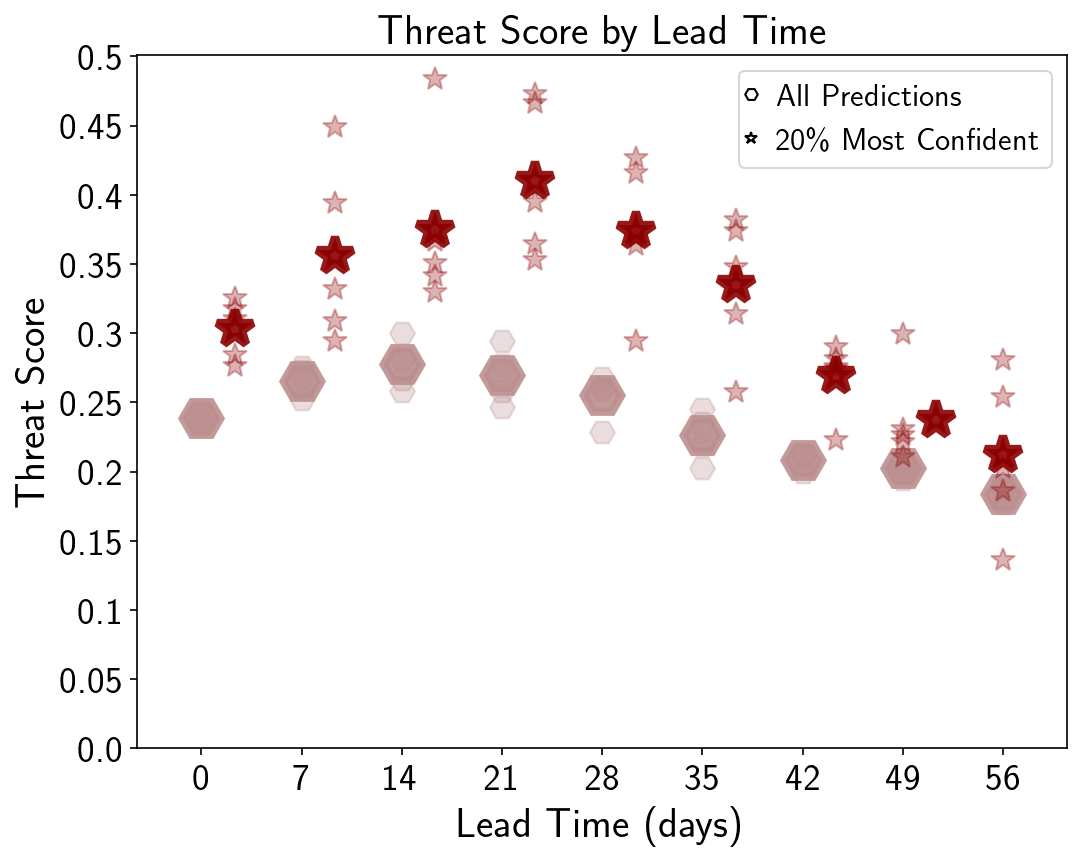

In [151]:
color1 = 'rosybrown'
color2 = 'darkred'

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#Plot Overall Accuracy of Each Test Member
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
array = np.arange(0,27,1)

fig, (ax1) = plt.subplots(1, figsize=(8,6))


ax1.plot(array[0],threat_score_l0T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[0],np.mean(threat_score_l0T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[1],threat_score_l0T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[1],np.mean(threat_score_l0T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)
# #ax1.plot(array[1],conf_preds0, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[3],threat_score_l1T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[3],np.mean(threat_score_l1T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[4],threat_score_l1T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[4],np.mean(threat_score_l1T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[6],threat_score_l2T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[6],np.mean(threat_score_l2T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[7],threat_score_l2T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[7],np.mean(threat_score_l2T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[9],threat_score_l3T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[9],np.mean(threat_score_l3T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[10],threat_score_l3T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[10],np.mean(threat_score_l3T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[12],threat_score_l4T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[12],np.mean(threat_score_l4T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[13],threat_score_l4T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[13],np.mean(threat_score_l4T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[15],threat_score_l5T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[15],np.mean(threat_score_l5T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[16],threat_score_l5T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[16],np.mean(threat_score_l5T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[18],threat_score_l6T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[18],np.mean(threat_score_l6T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[19],threat_score_l6T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[19],np.mean(threat_score_l6T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[21],threat_score_l7T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[21],np.mean(threat_score_l7T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[21],threat_score_l7T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[22],np.mean(threat_score_l7T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[24],threat_score_l8T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[24],np.mean(threat_score_l8T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[24],threat_score_l8T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[24],np.mean(threat_score_l8T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.set(xticks=(np.arange(0,27,step=3)))
#ax1.set(xlabel = 'Test Ensemble Member')
ax1.set_ylabel('Threat Score',fontsize=20)
ax1.set(yticks=(np.round(np.arange(0.00,0.51,step=0.05),2)))
ax1.set(yticklabels=(np.round(np.arange(0.00,0.51,step=0.05),2)))
ax1.set_xlabel('Lead Time (days)',fontsize=20)
ax1.set(xticklabels=['0','7','14','21', '28', '35', '42',  '49', '56'])
ax1.tick_params(axis='both',labelsize=18)

ax1.set_title('Threat Score by Lead Time',fontsize=20)


#ax1.fill_between(conf_ints[0],conf_ints[1])
plt.margins(x=0.08)

one = mlines.Line2D([], [], color='white', marker='H', markeredgecolor='black', label='All Predictions')
two = mlines.Line2D([], [], color='white', marker='*', markeredgecolor='black', label='20\% Most Confident')
#four = mlines.Line2D([], [], color='gray', marker='x', markeredgecolor='black', label='Accuracy of Untrained Networks')
plt.legend(handles=[one,two],handlelength=0, ncol=1,loc='upper right')#, bbox_to_anchor=(0.85, -0.1)) 
#plt.legend(handles=[one,four],handlelength=0, ncol=1, bbox_to_anchor=(0.85, -0.1))  

plt.savefig(ddir_out+'threatscore_allmodels_allseeds_allleads.png', format='png',dpi=150)

In [137]:
np.round(np.arange(0.00,0.51,step=0.05),2)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [145]:
threat_score_l0 = xr.open_dataarray(ddir_in+'gilbert_skill_score_l0.nc')
threat_score_l1 = xr.open_dataarray(ddir_in+'gilbert_skill_score_l1.nc')
threat_score_l2 = xr.open_dataarray(ddir_in+'gilbert_skill_score_l2.nc')
threat_score_l3 = xr.open_dataarray(ddir_in+'gilbert_skill_score_l3.nc')
threat_score_l4 = xr.open_dataarray(ddir_in+'gilbert_skill_score_l4.nc')
threat_score_l5 = xr.open_dataarray(ddir_in+'gilbert_skill_score_l5.nc')
threat_score_l6 = xr.open_dataarray(ddir_in+'gilbert_skill_score_l6.nc')
threat_score_l7 = xr.open_dataarray(ddir_in+'gilbert_skill_score_l7.nc')
threat_score_l8 = xr.open_dataarray(ddir_in+'gilbert_skill_score_l8.nc')

threat_score_l0T = xr.DataArray.expand_dims(threat_score_l0, dim = 'dim_1')
threat_score_l1T = xr.DataArray.expand_dims(threat_score_l1, dim = 'dim_1')
threat_score_l2T = xr.DataArray.expand_dims(threat_score_l2, dim = 'dim_1')
threat_score_l3T = xr.DataArray.expand_dims(threat_score_l3, dim = 'dim_1')
threat_score_l4T = xr.DataArray.expand_dims(threat_score_l4, dim = 'dim_1')
threat_score_l5T = xr.DataArray.expand_dims(threat_score_l5, dim = 'dim_1')
threat_score_l6T = xr.DataArray.expand_dims(threat_score_l6, dim = 'dim_1')
threat_score_l7T = xr.DataArray.expand_dims(threat_score_l7, dim = 'dim_1')
threat_score_l8T = xr.DataArray.expand_dims(threat_score_l8, dim = 'dim_1')


threat_score_l0_foo = xr.open_dataarray(ddir_in+'gilbert_skill_score_l0_FOO.nc')
threat_score_l1_foo = xr.open_dataarray(ddir_in+'gilbert_skill_score_l1_FOO.nc')
threat_score_l2_foo = xr.open_dataarray(ddir_in+'gilbert_skill_score_l2_FOO.nc')
threat_score_l3_foo = xr.open_dataarray(ddir_in+'gilbert_skill_score_l3_FOO.nc')
threat_score_l4_foo = xr.open_dataarray(ddir_in+'gilbert_skill_score_l4_FOO.nc')
threat_score_l5_foo = xr.open_dataarray(ddir_in+'gilbert_skill_score_l5_FOO.nc')
threat_score_l6_foo = xr.open_dataarray(ddir_in+'gilbert_skill_score_l6_FOO.nc')
threat_score_l7_foo = xr.open_dataarray(ddir_in+'gilbert_skill_score_l7_FOO.nc')
threat_score_l8_foo = xr.open_dataarray(ddir_in+'gilbert_skill_score_l8_FOO.nc')

threat_score_l0T_foo = xr.DataArray.expand_dims(threat_score_l0_foo, dim = 'dim_1')
threat_score_l1T_foo = xr.DataArray.expand_dims(threat_score_l1_foo, dim = 'dim_1')
threat_score_l2T_foo = xr.DataArray.expand_dims(threat_score_l2_foo, dim = 'dim_1')
threat_score_l3T_foo = xr.DataArray.expand_dims(threat_score_l3_foo, dim = 'dim_1')
threat_score_l4T_foo = xr.DataArray.expand_dims(threat_score_l4_foo, dim = 'dim_1')
threat_score_l5T_foo = xr.DataArray.expand_dims(threat_score_l5_foo, dim = 'dim_1')
threat_score_l6T_foo = xr.DataArray.expand_dims(threat_score_l6_foo, dim = 'dim_1')
threat_score_l7T_foo = xr.DataArray.expand_dims(threat_score_l7_foo, dim = 'dim_1')
threat_score_l8T_foo = xr.DataArray.expand_dims(threat_score_l8_foo, dim = 'dim_1')


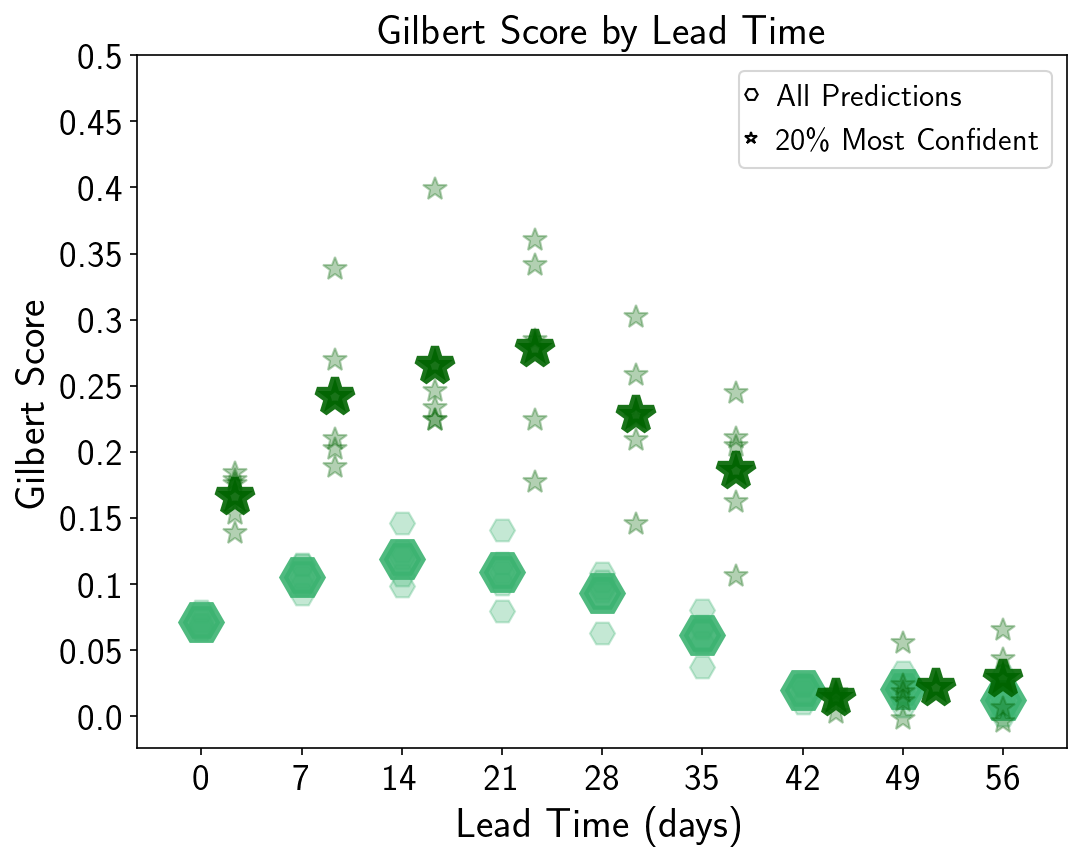

In [149]:
color1 = 'mediumseagreen'
color2 = 'darkgreen'

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#Plot Overall Accuracy of Each Test Member
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
array = np.arange(0,27,1)

fig, (ax1) = plt.subplots(1, figsize=(8,6))


ax1.plot(array[0],threat_score_l0T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[0],np.mean(threat_score_l0T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[1],threat_score_l0T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[1],np.mean(threat_score_l0T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)
# #ax1.plot(array[1],conf_preds0, 'D', color = 'gray', markeredgecolor='gray', markeredgewidth=1,markersize=6, alpha = 0.6)

ax1.plot(array[3],threat_score_l1T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[3],np.mean(threat_score_l1T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[4],threat_score_l1T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[4],np.mean(threat_score_l1T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[6],threat_score_l2T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[6],np.mean(threat_score_l2T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[7],threat_score_l2T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[7],np.mean(threat_score_l2T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[9],threat_score_l3T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[9],np.mean(threat_score_l3T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[10],threat_score_l3T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[10],np.mean(threat_score_l3T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[12],threat_score_l4T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[12],np.mean(threat_score_l4T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[13],threat_score_l4T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[13],np.mean(threat_score_l4T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[15],threat_score_l5T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[15],np.mean(threat_score_l5T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[16],threat_score_l5T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[16],np.mean(threat_score_l5T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[18],threat_score_l6T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[18],np.mean(threat_score_l6T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[19],threat_score_l6T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[19],np.mean(threat_score_l6T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[21],threat_score_l7T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[21],np.mean(threat_score_l7T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[21],threat_score_l7T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[22],np.mean(threat_score_l7T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.plot(array[24],threat_score_l8T, 'H', color = color1, markeredgecolor=color1, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[24],np.mean(threat_score_l8T), 'H', color = color1, markeredgecolor=color1, markeredgewidth=4,markersize=18, alpha = 0.9)
ax1.plot(array[24],threat_score_l8T_foo, '*', color = color2, markeredgecolor=color2, markeredgewidth=1,markersize=12, alpha = 0.3)
ax1.plot(array[24],np.mean(threat_score_l8T_foo), '*', color = color2, markeredgecolor=color2, markeredgewidth=4,markersize=18, alpha = 0.9)

ax1.set(xticks=(np.arange(0,27,step=3)))
#ax1.set(xlabel = 'Test Ensemble Member')
ax1.set_ylabel('Gilbert Score',fontsize=20)
ax1.set(yticks=(np.round(np.arange(0.00,0.51,step=0.05),2)))
ax1.set(yticklabels=(np.round(np.arange(0.00,0.51,step=0.05),2)))
ax1.set_xlabel('Lead Time (days)',fontsize=20)
ax1.set(xticklabels=['0','7','14','21', '28', '35', '42',  '49', '56'])
ax1.tick_params(axis='both',labelsize=18)

ax1.set_title('Gilbert Score by Lead Time',fontsize=20)


#ax1.fill_between(conf_ints[0],conf_ints[1])
plt.margins(x=0.08)

one = mlines.Line2D([], [], color='white', marker='H', markeredgecolor='black', label='All Predictions')
two = mlines.Line2D([], [], color='white', marker='*', markeredgecolor='black', label='20\% Most Confident')
#four = mlines.Line2D([], [], color='gray', marker='x', markeredgecolor='black', label='Accuracy of Untrained Networks')
plt.legend(handles=[one,two],handlelength=0, ncol=1,loc='upper right')#, bbox_to_anchor=(0.85, -0.1)) 
#plt.legend(handles=[one,four],handlelength=0, ncol=1, bbox_to_anchor=(0.85, -0.1))  

plt.savefig(ddir_out+'gilbertscore_allmodels_allseeds_allleads.png', format='png',dpi=150)